# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [6]:
# Import essential libraries for data manipulation and analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler



## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [9]:
# Importing the file porter_data_1.csv
df = pd.read_csv("porter_data_1.csv")
df.dropna(inplace=True)

In [11]:
df.head()

market_id           created_at actual_delivery_time  \
0        1.0  2015-02-06 22:24:17  2015-02-06 23:11:17   
1        2.0  2015-02-10 21:49:25  2015-02-10 22:33:25   
2        2.0  2015-02-16 00:11:35  2015-02-16 01:06:35   
3        1.0  2015-02-12 03:36:46  2015-02-12 04:35:46   
4        1.0  2015-01-27 02:12:36  2015-01-27 02:58:36   

   store_primary_category  order_protocol  total_items  subtotal  \
0                       4             1.0            4      3441   
1                      46             2.0            1      1900   
2                      36             3.0            4      4771   
3                      38             1.0            1      1525   
4                      38             1.0            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   3             820            1604                    8.0   
3                   1            1525            1525                    5.0   
4                   2            1425            2195                    5.0   

   total_busy_dashers  total_outstanding_orders  distance  
0                14.0                      21.0     34.44  
1                 2.0                       2.0     27.60  
2                 6.0                      18.0     11.56  
3                 6.0                       8.0     31.80  
4                 5.0                       7.0      8.20

In [13]:
df.shape

(175777, 14)

##### There are 175777 records with 14 rows

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

In [17]:
df.dtypes

market_id                   float64
created_at                   object
actual_delivery_time         object
store_primary_category        int64
order_protocol              float64
total_items                   int64
subtotal                      int64
num_distinct_items            int64
min_item_price                int64
max_item_price                int64
total_onshift_dashers       float64
total_busy_dashers          float64
total_outstanding_orders    float64
distance                    float64
dtype: object

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 175777 non-null  float64
 1   created_at                175777 non-null  object 
 2   actual_delivery_time      175777 non-null  object 
 3   store_primary_category    175777 non-null  int64  
 4   order_protocol            175777 non-null  float64
 5   total_items               175777 non-null  int64  
 6   subtotal                  175777 non-null  int64  
 7   num_distinct_items        175777 non-null  int64  
 8   min_item_price            175777 non-null  int64  
 9   max_item_price            175777 non-null  int64  
 10  total_onshift_dashers     175777 non-null  float64
 11  total_busy_dashers        175777 non-null  float64
 12  total_outstanding_orders  175777 non-null  float64
 13  distance                  175777 non-null  f

In [21]:
df.isnull().sum()

market_id                   0
created_at                  0
actual_delivery_time        0
store_primary_category      0
order_protocol              0
total_items                 0
subtotal                    0
num_distinct_items          0
min_item_price              0
max_item_price              0
total_onshift_dashers       0
total_busy_dashers          0
total_outstanding_orders    0
distance                    0
dtype: int64

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [25]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format

df["created_at"] = pd.to_datetime(df["created_at"])
df["actual_delivery_time"] = pd.to_datetime(df["actual_delivery_time"])

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 175777 non-null  float64       
 1   created_at                175777 non-null  datetime64[ns]
 2   actual_delivery_time      175777 non-null  datetime64[ns]
 3   store_primary_category    175777 non-null  int64         
 4   order_protocol            175777 non-null  float64       
 5   total_items               175777 non-null  int64         
 6   subtotal                  175777 non-null  int64         
 7   num_distinct_items        175777 non-null  int64         
 8   min_item_price            175777 non-null  int64         
 9   max_item_price            175777 non-null  int64         
 10  total_onshift_dashers     175777 non-null  float64       
 11  total_busy_dashers        175777 non-null  float64       
 12  to

##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [30]:
# Convert categorical features to category type

df["market_id"] = df["market_id"].astype(int)  ### market ids where the restaurant is located, will always be a whole numbers
df["order_protocol"] = df["order_protocol"].astype(int) ### representing how the order was placed will always be a whole number
df["total_onshift_dashers"] = df["total_onshift_dashers"].astype(int) ### Number of delivery partners will alway be a whole number
df["total_busy_dashers"] = df["total_busy_dashers"].astype(int) ### Number of delivery partners will alway be a whole number
df["total_outstanding_orders"] = df["total_outstanding_orders"].astype(int) ### Number of orders pending fulfillment will always be whole number.

In [32]:
df.head()

market_id          created_at actual_delivery_time  store_primary_category  \
0          1 2015-02-06 22:24:17  2015-02-06 23:11:17                       4   
1          2 2015-02-10 21:49:25  2015-02-10 22:33:25                      46   
2          2 2015-02-16 00:11:35  2015-02-16 01:06:35                      36   
3          1 2015-02-12 03:36:46  2015-02-12 04:35:46                      38   
4          1 2015-01-27 02:12:36  2015-01-27 02:58:36                      38   

   order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0               1            4      3441                   4             557   
1               2            1      1900                   1            1400   
2               3            4      4771                   3             820   
3               1            1      1525                   1            1525   
4               1            2      3620                   2            1425   

   max_item_price  total_onshift_dashers  total_busy_dashers  \
0            1239                     33                  14   
1            1400                      1                   2   
2            1604                      8                   6   
3            1525                      5                   6   
4            2195                      5                   5   

   total_outstanding_orders  distance  
0                        21     34.44  
1                         2     27.60  
2                        18     11.56  
3                         8     31.80  
4                         7      8.20

#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [36]:
df.columns

Index(['market_id', 'created_at', 'actual_delivery_time',
       'store_primary_category', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance'],
      dtype='object')

In [38]:
# Calculate time taken in minutes

df['delivery_timetaken_InMinutes'] = (df['actual_delivery_time'] - df['created_at']).dt.total_seconds() / 60



In [40]:
df.head()

market_id          created_at actual_delivery_time  store_primary_category  \
0          1 2015-02-06 22:24:17  2015-02-06 23:11:17                       4   
1          2 2015-02-10 21:49:25  2015-02-10 22:33:25                      46   
2          2 2015-02-16 00:11:35  2015-02-16 01:06:35                      36   
3          1 2015-02-12 03:36:46  2015-02-12 04:35:46                      38   
4          1 2015-01-27 02:12:36  2015-01-27 02:58:36                      38   

   order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0               1            4      3441                   4             557   
1               2            1      1900                   1            1400   
2               3            4      4771                   3             820   
3               1            1      1525                   1            1525   
4               1            2      3620                   2            1425   

   max_item_price  total_onshift_dashers  total_busy_dashers  \
0            1239                     33                  14   
1            1400                      1                   2   
2            1604                      8                   6   
3            1525                      5                   6   
4            2195                      5                   5   

   total_outstanding_orders  distance  delivery_timetaken_InMinutes  
0                        21     34.44                          47.0  
1                         2     27.60                          44.0  
2                        18     11.56                          55.0  
3                         8     31.80                          59.0  
4                         7      8.20                          46.0

##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [43]:
# Extract the hour and day of week from the 'created_at' timestamp
df['OrderCreated_hour'] = df['created_at'].dt.hour  # Extract hour (0-23)
df['OrderCreated_day_of_week'] = df['created_at'].dt.day_name()  # Extract full day name

# Create a categorical feature 'isWeekend'
df['isWeekend'] = df['OrderCreated_day_of_week'].apply(lambda x : 1 if x in ('Sunday','Saturday') else 0)

# Mapping Days to constants for better Analysis => Sun = 3,Mon=1,Tues=5,Wed=6,Thurs=4,Fri=0,Sat=2
label_encoder = LabelEncoder()
df['OrderCreated_day_of_week'] = label_encoder.fit_transform(df['OrderCreated_day_of_week'])




In [44]:
df.head(10)

market_id          created_at actual_delivery_time  store_primary_category  \
0          1 2015-02-06 22:24:17  2015-02-06 23:11:17                       4   
1          2 2015-02-10 21:49:25  2015-02-10 22:33:25                      46   
2          2 2015-02-16 00:11:35  2015-02-16 01:06:35                      36   
3          1 2015-02-12 03:36:46  2015-02-12 04:35:46                      38   
4          1 2015-01-27 02:12:36  2015-01-27 02:58:36                      38   
5          1 2015-02-06 00:42:42  2015-02-06 01:38:42                      38   
6          1 2015-02-08 02:04:17  2015-02-08 03:07:17                      38   
7          1 2015-01-31 04:35:54  2015-01-31 05:33:54                      38   
8          1 2015-01-31 02:21:23  2015-01-31 02:58:23                      46   
9          1 2015-01-31 23:45:12  2015-02-01 00:26:12                      46   

   order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0               1            4      3441                   4             557   
1               2            1      1900                   1            1400   
2               3            4      4771                   3             820   
3               1            1      1525                   1            1525   
4               1            2      3620                   2            1425   
5               1            3      4475                   3             925   
6               1            3      4375                   3            1325   
7               1            2      3150                   2            1425   
8               1            2       950                   2             150   
9               1            5      1285                   3             150   

   max_item_price  total_onshift_dashers  total_busy_dashers  \
0            1239                     33                  14   
1            1400                      1                   2   
2            1604                      8                   6   
3            1525                      5                   6   
4            2195                      5                   5   
5            1825                      4                   1   
6            1625                      6                   4   
7            1725                      4                   9   
8             700                     24                  24   
9             400                     12                  13   

   total_outstanding_orders  distance  delivery_timetaken_InMinutes  \
0                        21     34.44                          47.0   
1                         2     27.60                          44.0   
2                        18     11.56                          55.0   
3                         8     31.80                          59.0   
4                         7      8.20                          46.0   
5                         1     21.68                          56.0   
6                         3     31.56                          63.0   
7                        12     21.92                          58.0   
8                        26      8.48                          37.0   
9                        11     16.96                          41.0   

   OrderCreated_hour  OrderCreated_day_of_week  isWeekend  
0                 22                         0          0  
1                 21                         5          0  
2                  0                         1          0  
3                  3                         4          0  
4                  2                         5          0  
5                  0                         0          0  
6                  2                         3          1  
7                  4                         2          1  
8                  2                         2          1  
9                 23                         2          1

In [47]:
# Drop unnecessary columns
df.drop(['created_at' , 'actual_delivery_time' , 'num_distinct_items'], axis=1, inplace = True)


In [49]:
# Remove rows with negative values
df = df[(df >= 0).all(axis=1)]

In [51]:
df.shape

(175687, 15)

In [53]:
df.value_counts()

market_id  store_primary_category  order_protocol  total_items  subtotal  min_item_price  max_item_price  total_onshift_dashers  total_busy_dashers  total_outstanding_orders  distance  delivery_timetaken_InMinutes  OrderCreated_hour  OrderCreated_day_of_week  isWeekend
2          58                      3               2            748       369             379             3                      2                   3                         20.28     41.0                          16                 4                         0            2
1          40                      1               2            1750      650             1100            0                      0                   0                         21.48     51.0                          20                 1                         0            2
4          34                      5               1            699       699             699             87                     82                  129                       7.52 

#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [57]:
# Define target variable (y) and features (X)

y = df['delivery_timetaken_InMinutes']
X = df[['distance','market_id','store_primary_category','order_protocol','OrderCreated_hour','isWeekend','total_items','subtotal','min_item_price','max_item_price','total_onshift_dashers','total_busy_dashers']]


##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [60]:
# Split data into training and testing sets
np.random.seed(0)
df_train,df_test = train_test_split(df,train_size=0.8,test_size=0.2,random_state=100)
print(df_train.shape)
print(df_test.shape)


(140549, 15)
(35138, 15)


## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


# Define numerical and categorical columns for easy EDA and data manipulation

--------------------------

| <b> Numerical columns  :  </b>|  total_items ,  subtotal ,  min_item_price,  max_item_price, total_onshift_dashers , total_busy_dashers , total_outstanding_orders, distance, delivery_timetaken_InMinutes

| <b>  Categorical columns :  </b>| market_id , store_primary_category , order_protocol , isWeekend , OrderCreated_day_of_week, OrderCreated_hour


##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

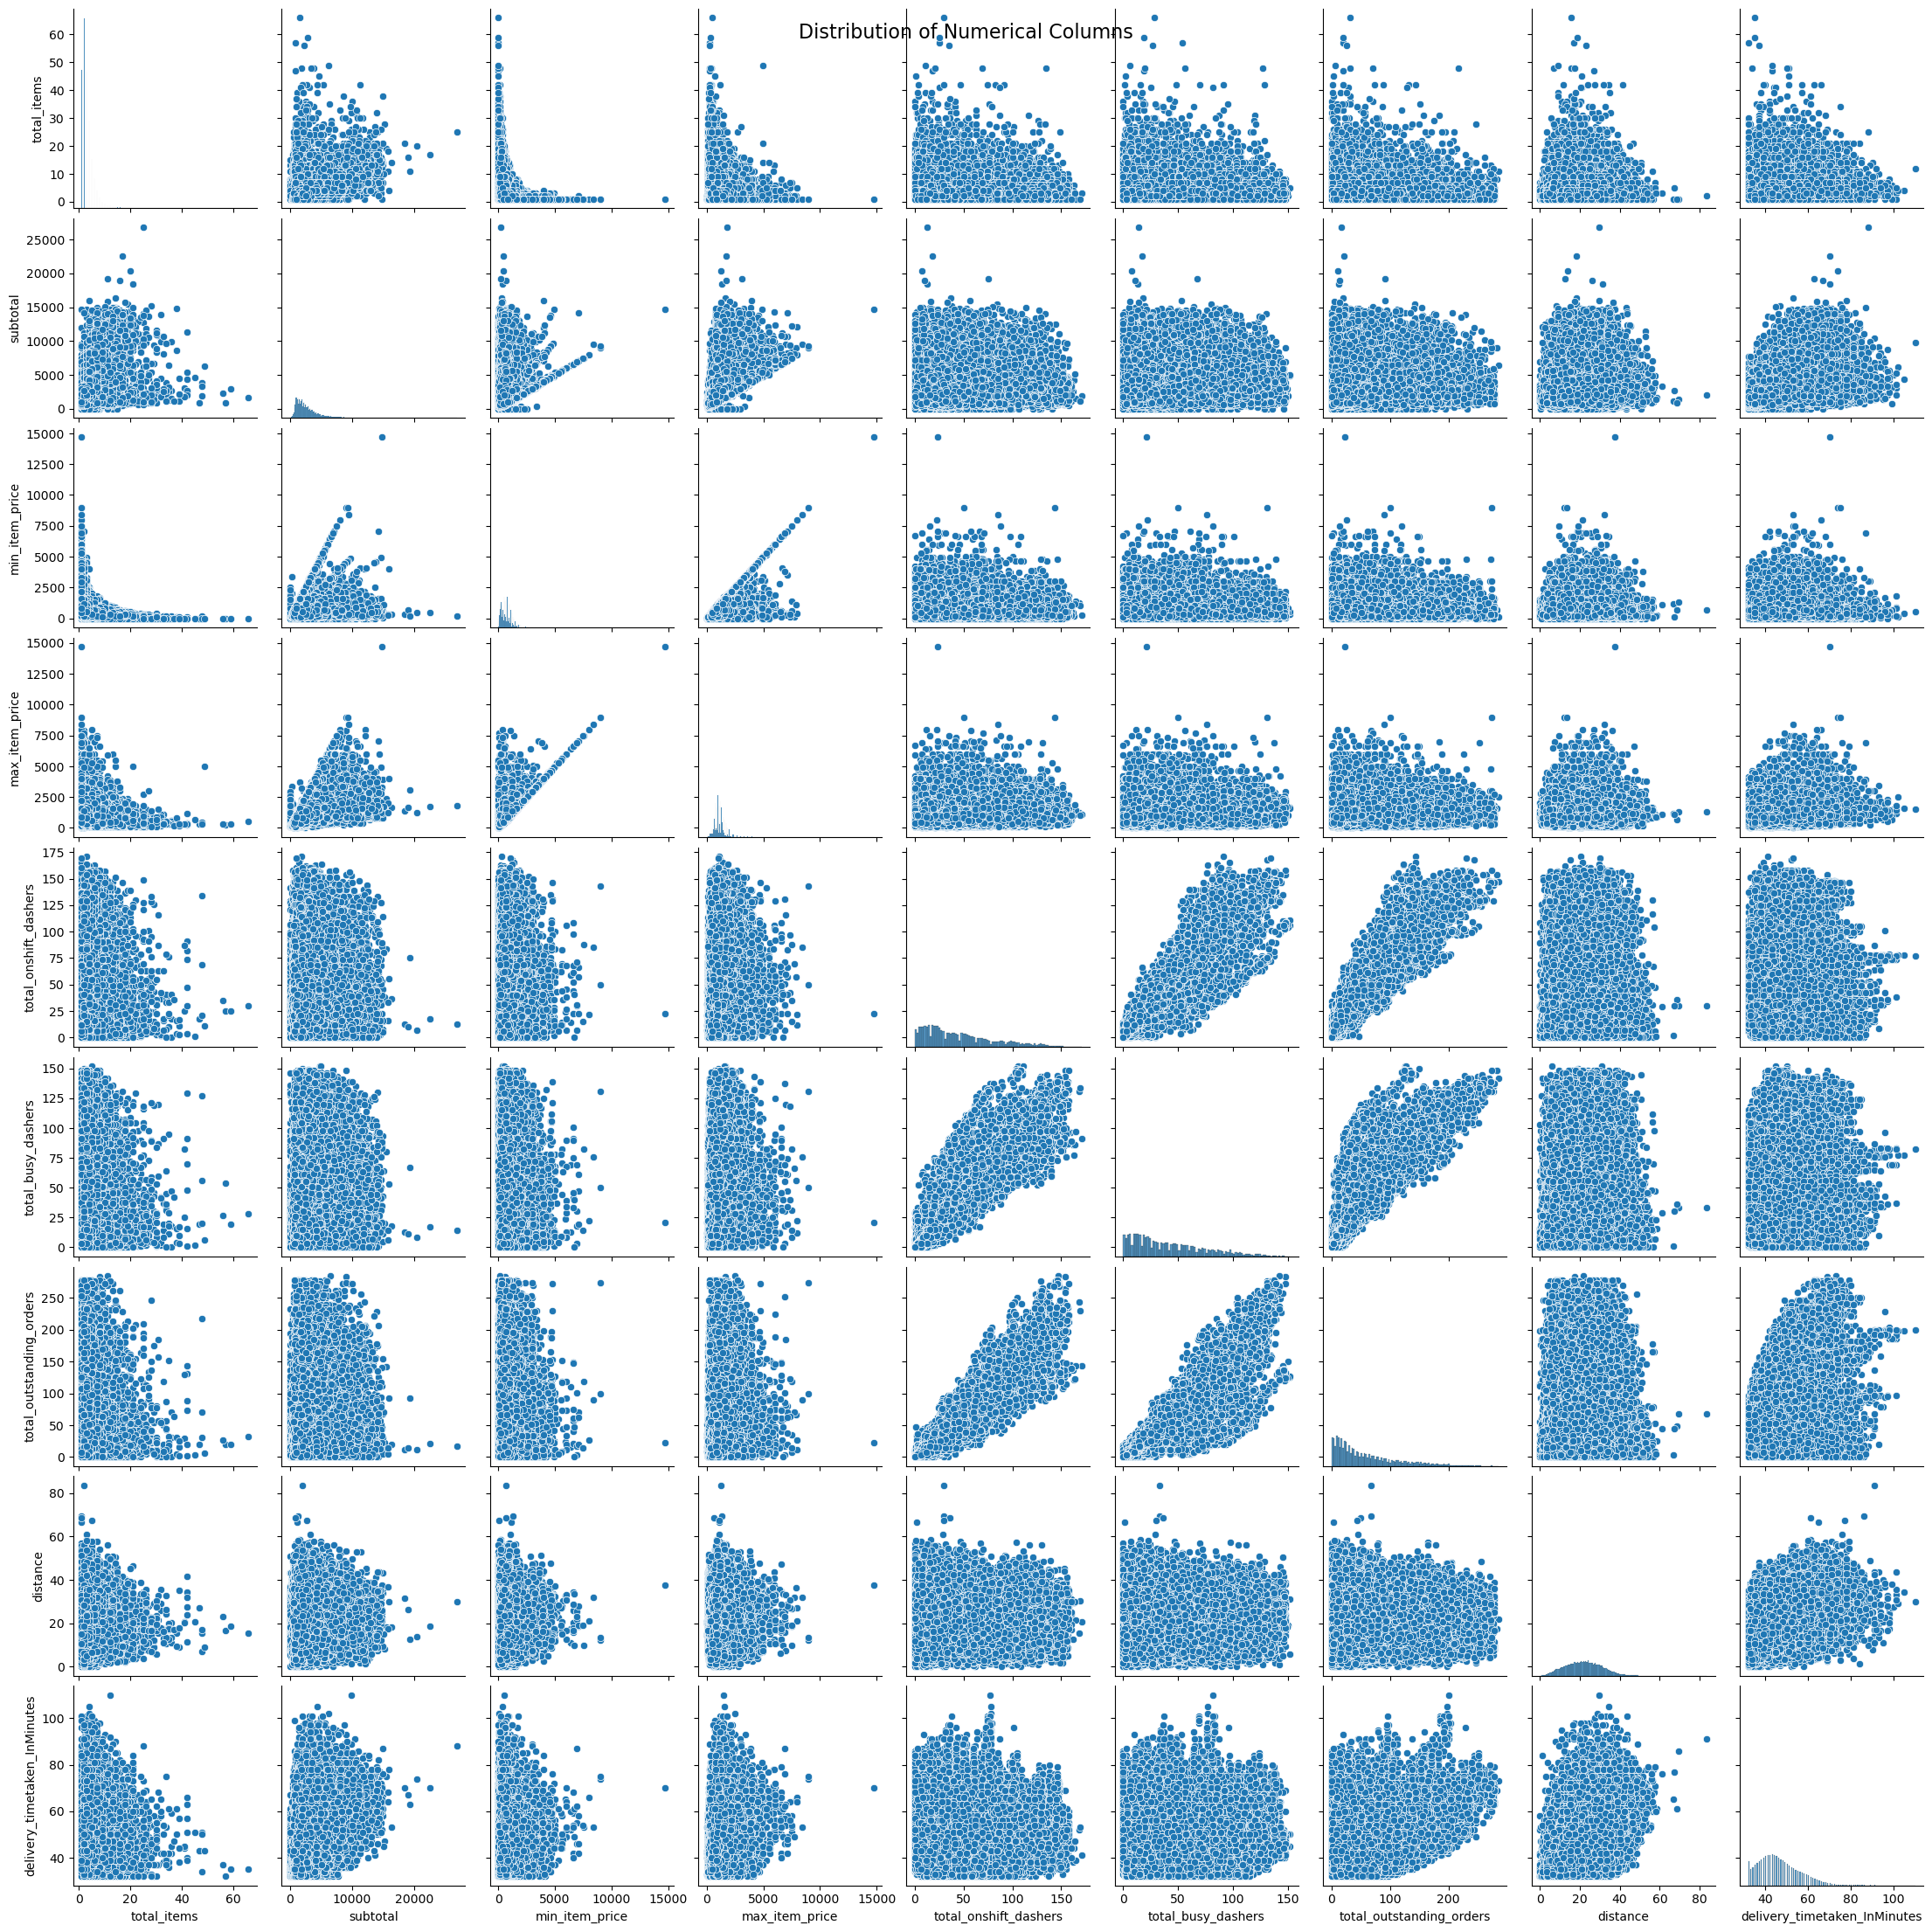

In [66]:
# Plot distributions for all numerical columns

sns.pairplot(df_train[['total_items' ,  'subtotal' ,  'min_item_price',  'max_item_price', 'total_onshift_dashers' , 'total_busy_dashers' , 'total_outstanding_orders', 'distance', 'delivery_timetaken_InMinutes']])
plt.suptitle("Distribution of Numerical Columns", y = 0.98, fontsize=16)
plt.show()

##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

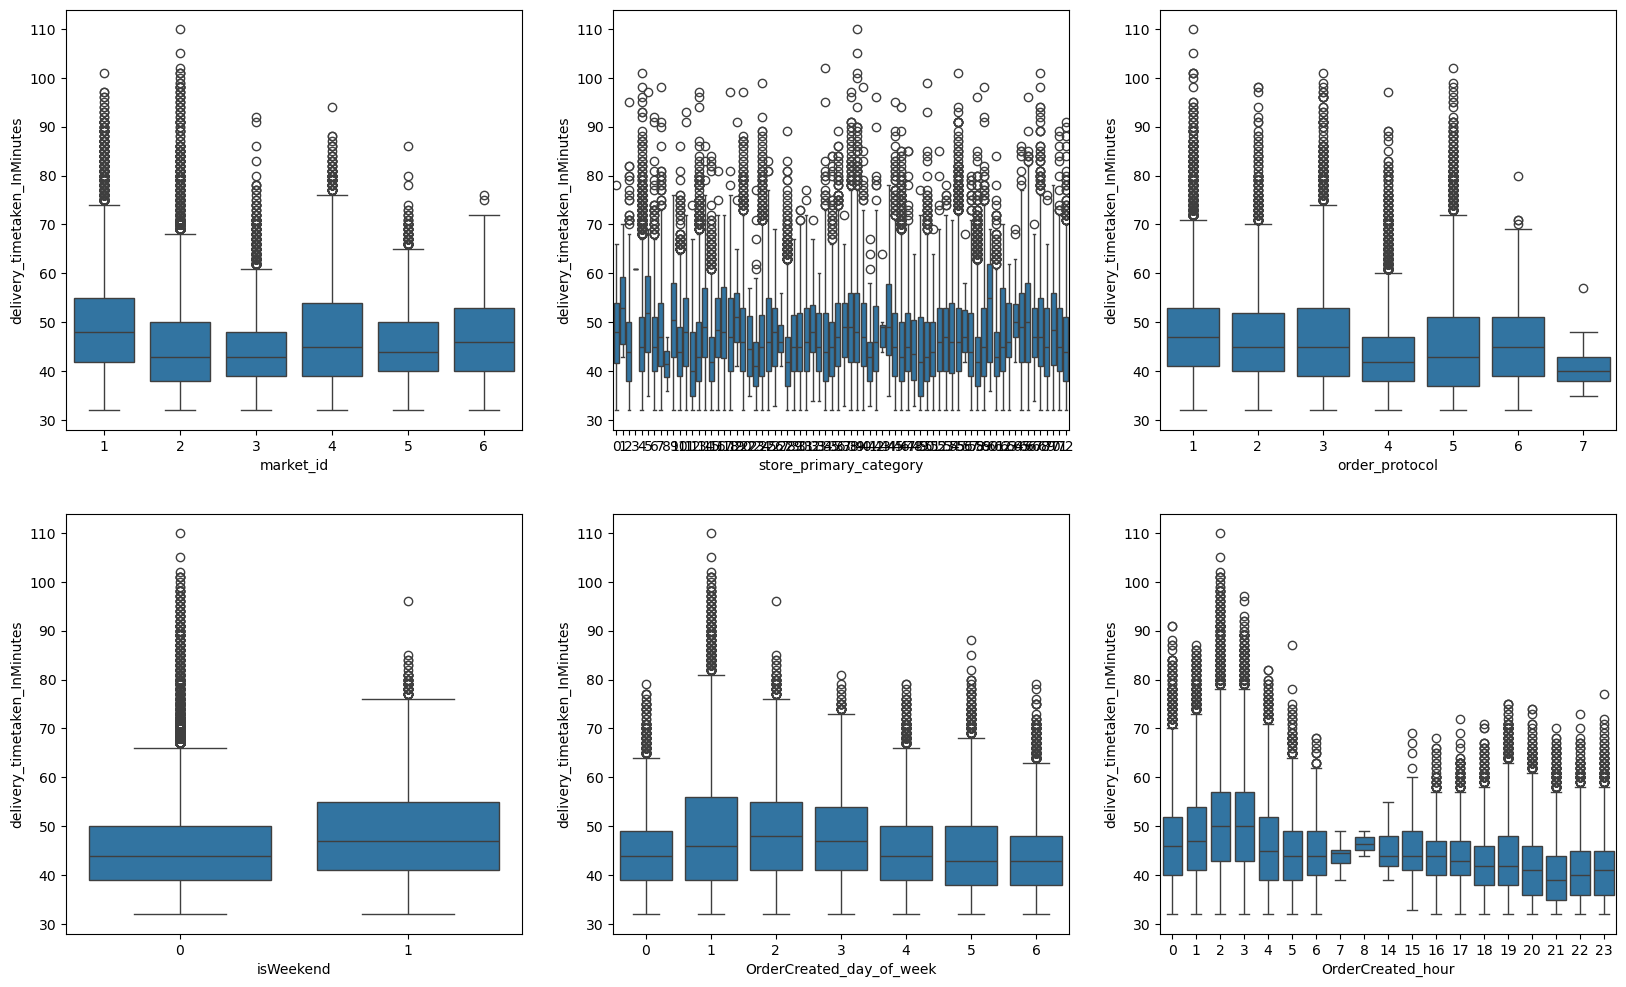

In [69]:
# Distribution of categorical columns

plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
sns.boxplot(x='market_id',y='delivery_timetaken_InMinutes',data=df_train)
plt.subplot(2,3,2)
sns.boxplot(x='store_primary_category',y='delivery_timetaken_InMinutes',data=df_train)
plt.subplot(2,3,3)
sns.boxplot(x='order_protocol',y='delivery_timetaken_InMinutes',data=df_train)
plt.subplot(2,3,4)
sns.boxplot(x='isWeekend',y='delivery_timetaken_InMinutes',data=df_train)
plt.subplot(2,3,5)
sns.boxplot(x='OrderCreated_day_of_week',y='delivery_timetaken_InMinutes',data=df_train)
plt.subplot(2,3,6)
sns.boxplot(x='OrderCreated_hour',y='delivery_timetaken_InMinutes',data=df_train)
plt.show()

<Axes: xlabel='OrderCreated_hour', ylabel='delivery_timetaken_InMinutes'>

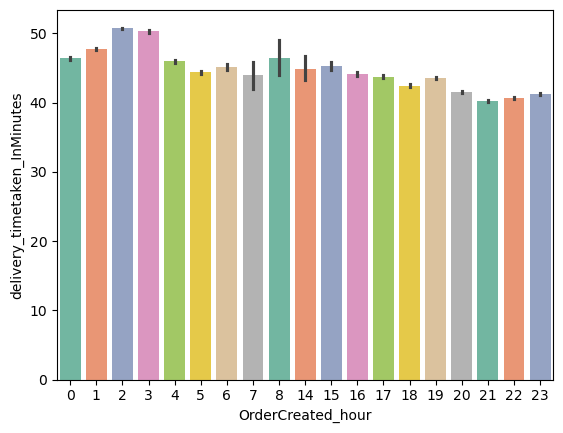

In [71]:
sns.barplot(data=df_train,x='OrderCreated_hour',y='delivery_timetaken_InMinutes',hue='OrderCreated_hour', palette='Set2', legend=False)

<Axes: xlabel='OrderCreated_day_of_week', ylabel='delivery_timetaken_InMinutes'>

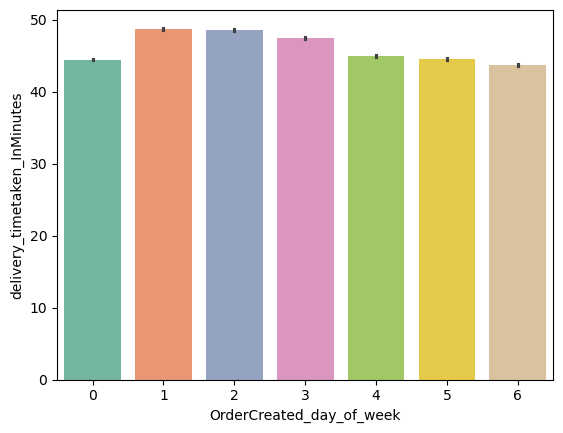

In [72]:
sns.barplot(data=df_train,x='OrderCreated_day_of_week',y='delivery_timetaken_InMinutes',hue='OrderCreated_day_of_week', palette='Set2', legend=False)

<Axes: xlabel='order_protocol', ylabel='delivery_timetaken_InMinutes'>

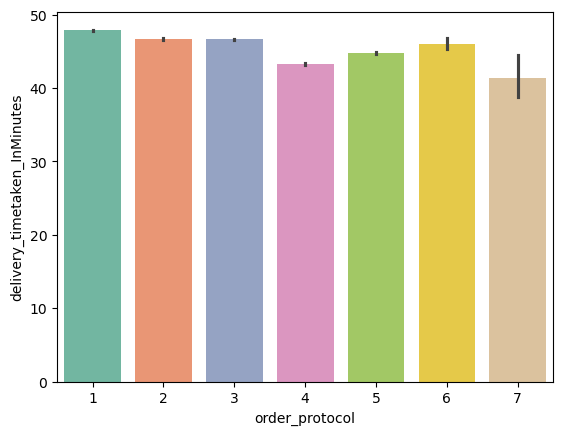

In [73]:
sns.barplot(data=df_train,x='order_protocol',y='delivery_timetaken_InMinutes',hue='order_protocol', palette='Set2', legend=False)

<Axes: xlabel='market_id', ylabel='delivery_timetaken_InMinutes'>

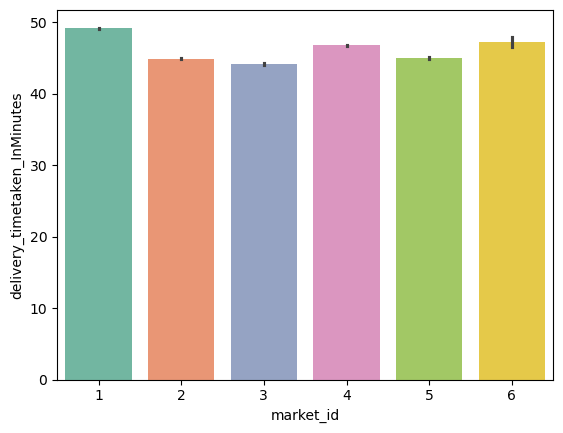

In [74]:
sns.barplot(data=df_train,x='market_id',y='delivery_timetaken_InMinutes',hue='market_id', palette='Set2', legend=False)

<Axes: xlabel='store_primary_category', ylabel='delivery_timetaken_InMinutes'>

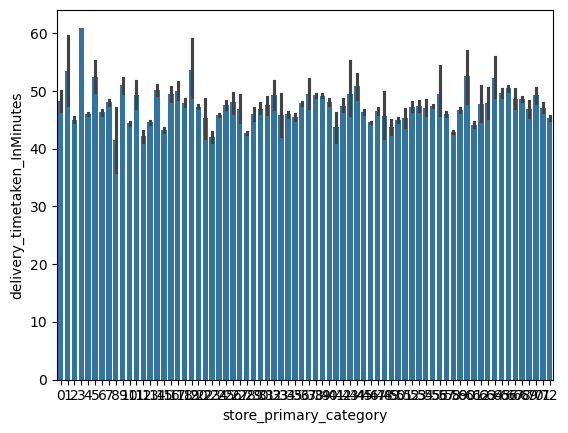

In [75]:
sns.barplot(data=df_train,x='store_primary_category',y='delivery_timetaken_InMinutes')

##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

<Axes: ylabel='delivery_timetaken_InMinutes'>

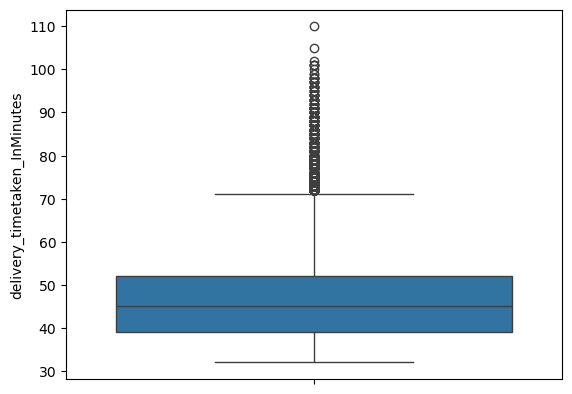

In [77]:
# Distribution of time_taken
sns.boxplot(df_train['delivery_timetaken_InMinutes'])


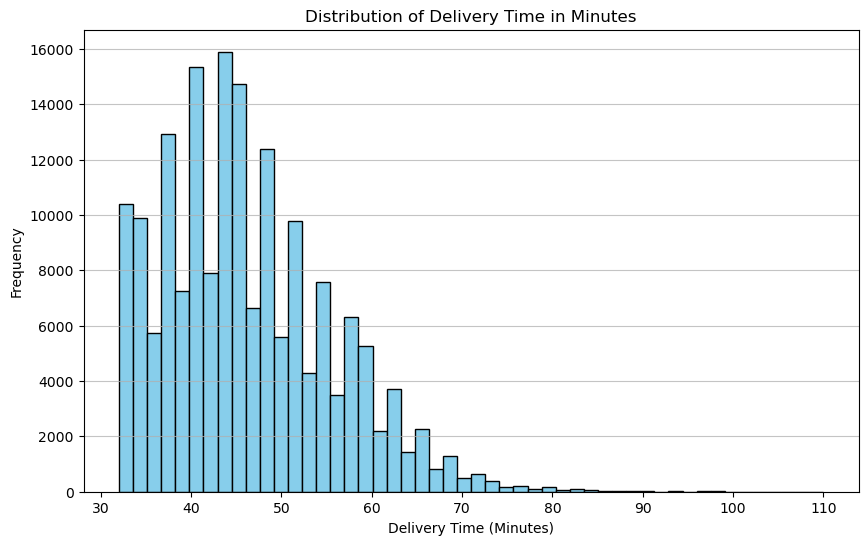

In [78]:
# Plot the distribution of delivery time in minutes
plt.figure(figsize=(10, 6))
plt.hist(df['delivery_timetaken_InMinutes'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Delivery Time in Minutes')
plt.xlabel('Delivery Time (Minutes)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()


#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

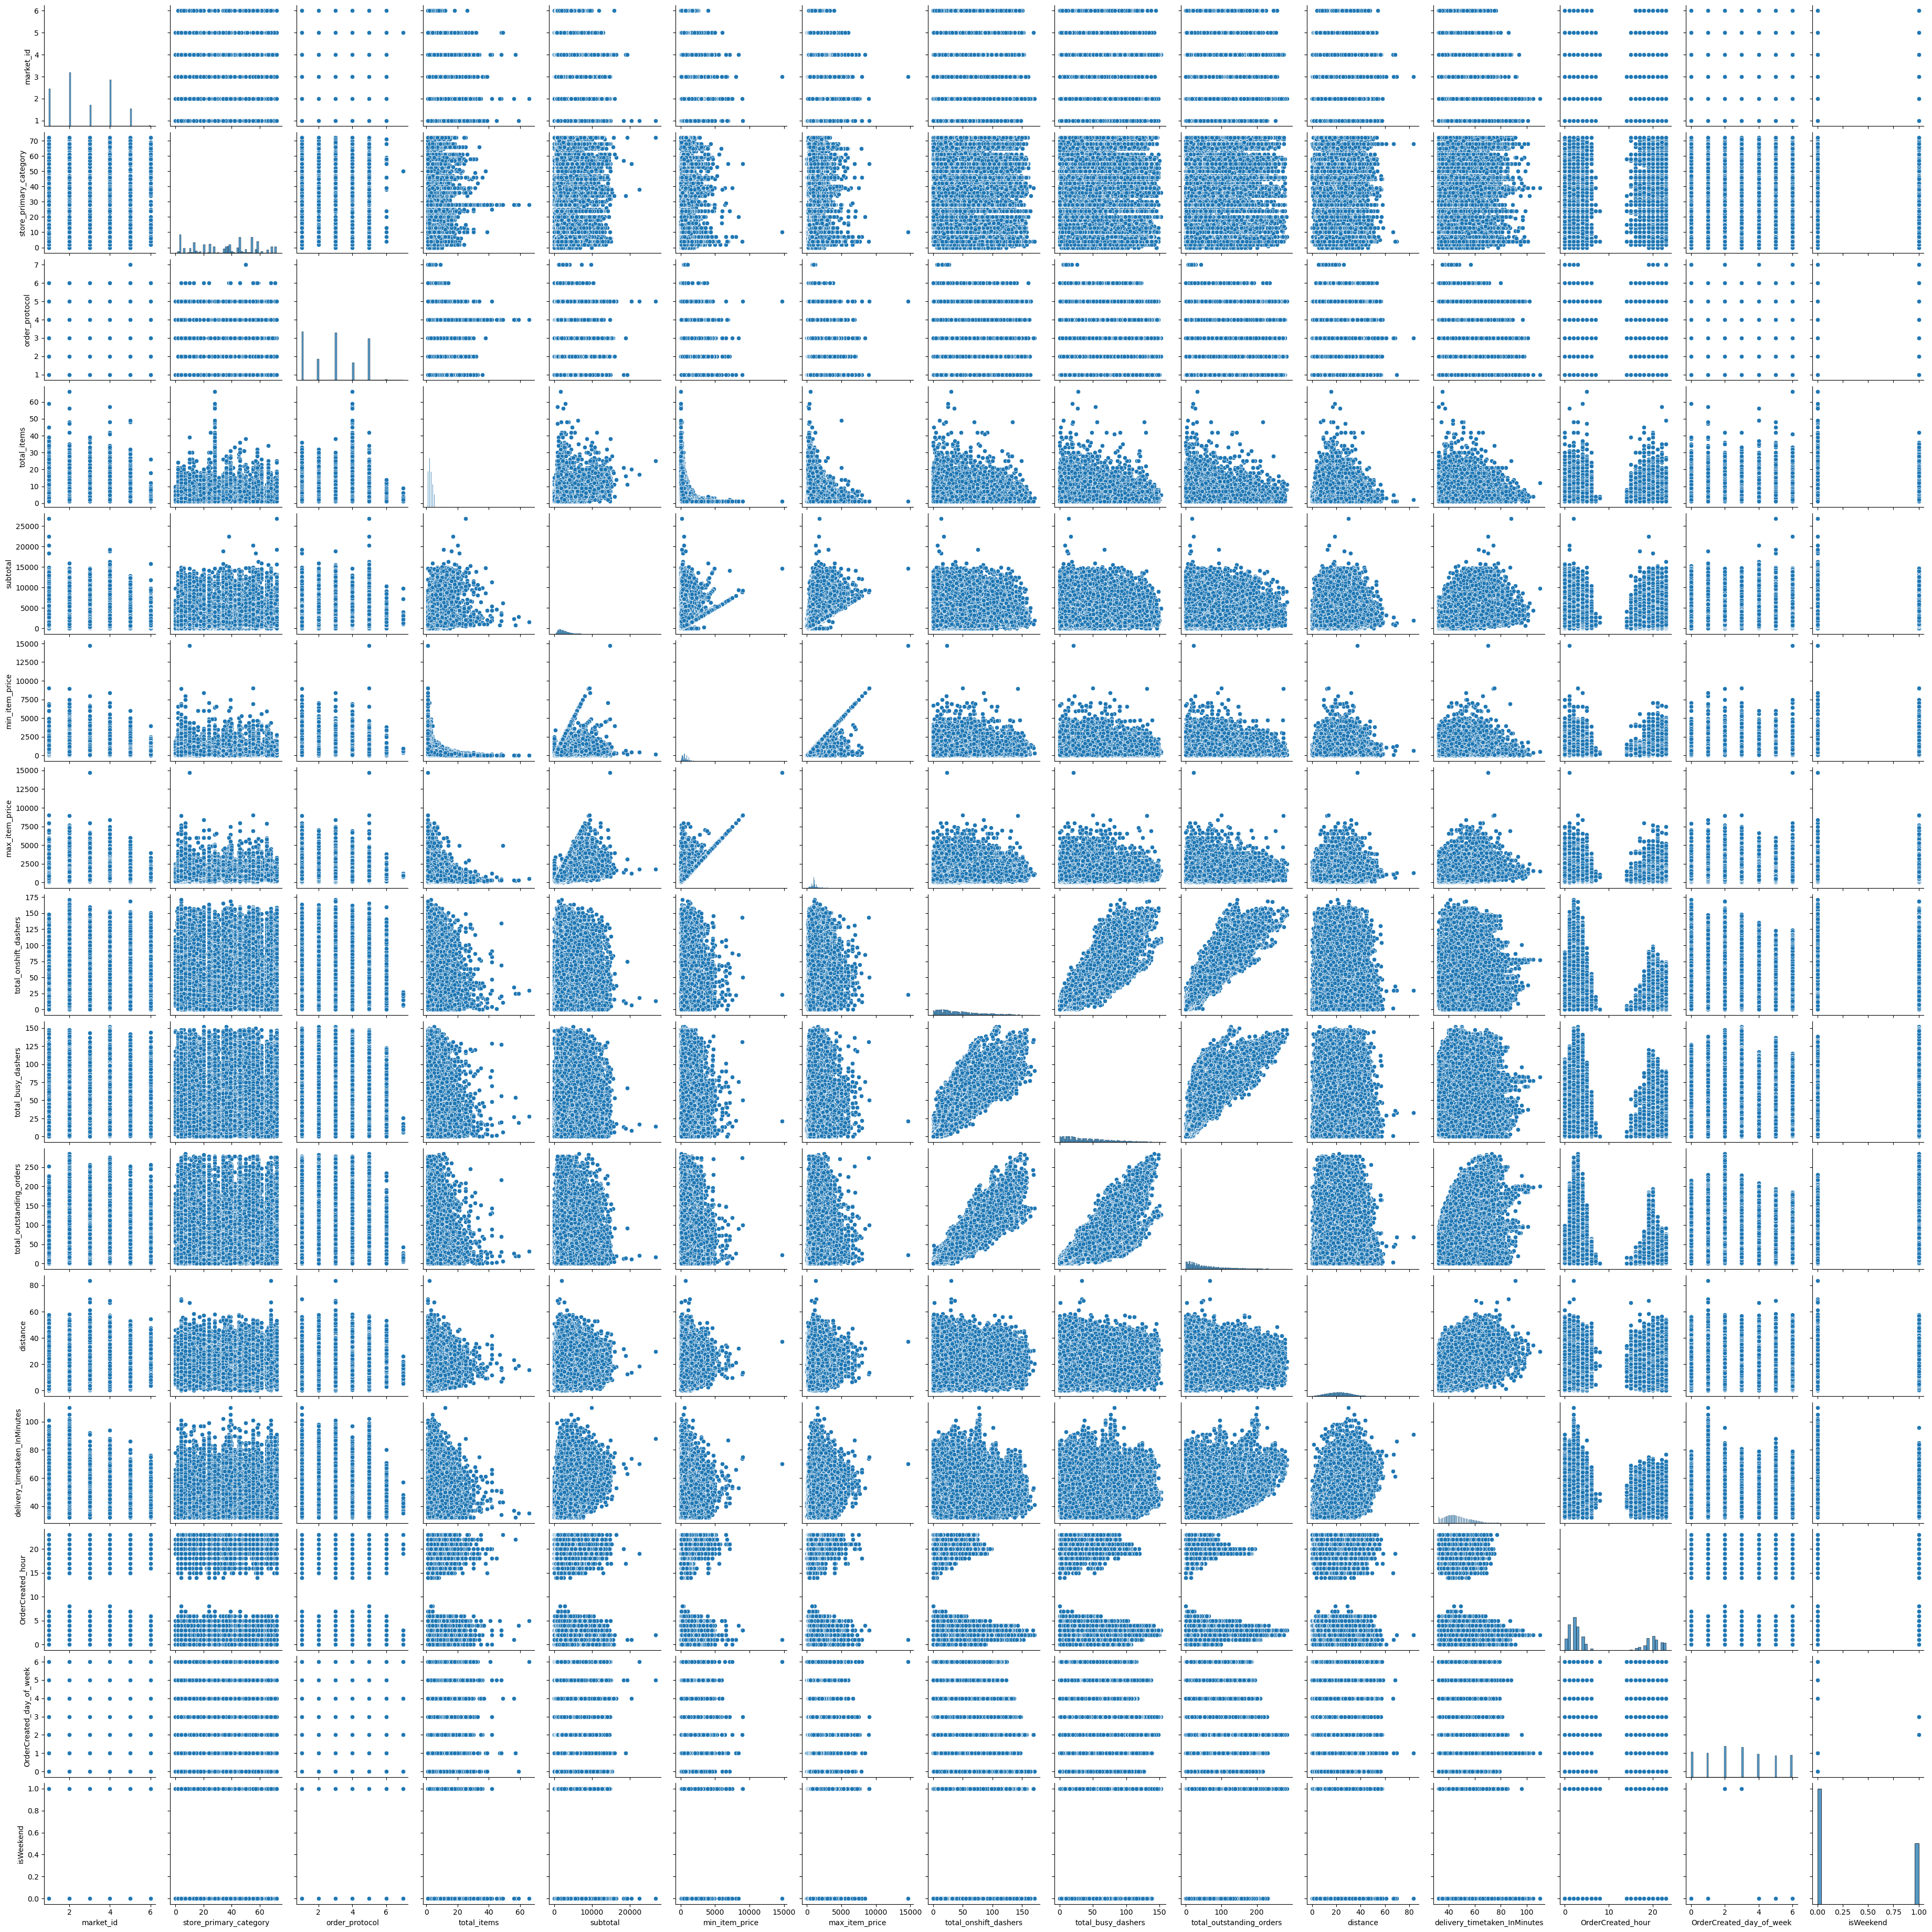

In [81]:
# Scatter plot to visualise the relationship between time_taken and other features

sns.pairplot(df_train)
plt.show()

<Axes: xlabel='OrderCreated_hour', ylabel='delivery_timetaken_InMinutes'>

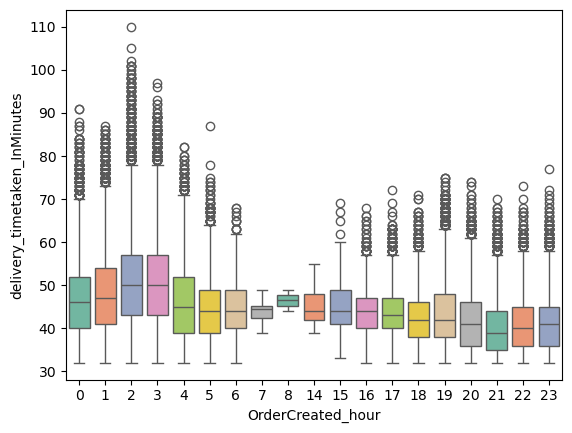

In [82]:
# Show the distribution of time_taken for different hours
sns.boxplot(data=df_train,x='OrderCreated_hour',y='delivery_timetaken_InMinutes',hue='OrderCreated_hour', palette='Set2', legend=False)


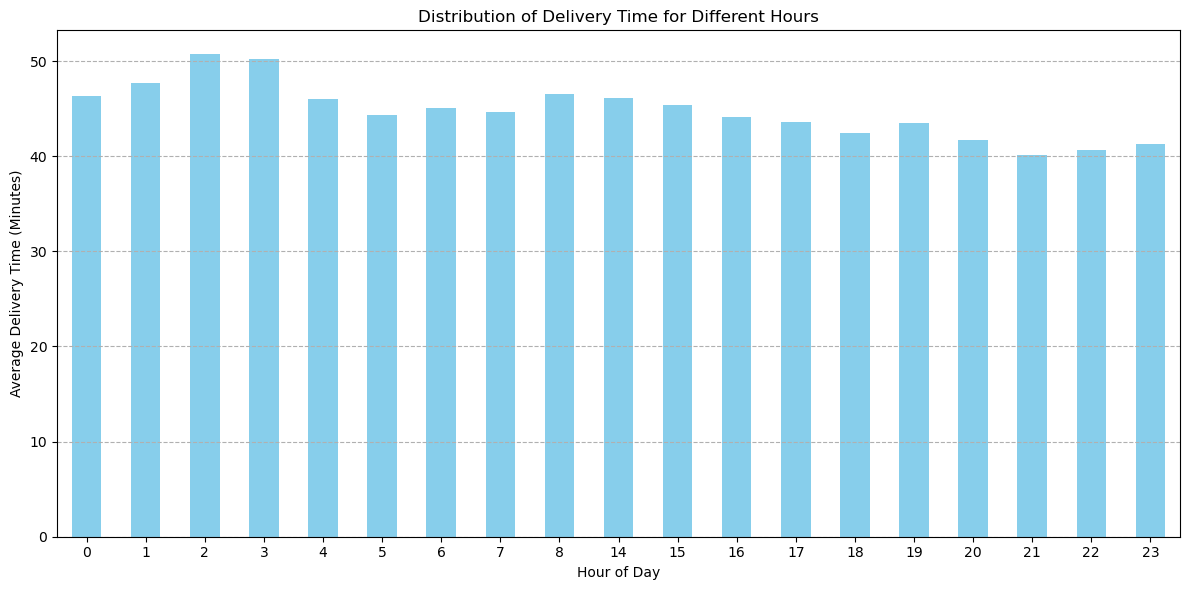

In [83]:
# Show the distribution of time_taken for different hours
# Group by order hour and calculate the mean delivery time
hourly_delivery_time = df.groupby('OrderCreated_hour')['delivery_timetaken_InMinutes'].mean()

# Plotting the distribution of delivery time for different hours
plt.figure(figsize=(12, 6))
hourly_delivery_time.plot(kind='bar', color='skyblue')
plt.title('Distribution of Delivery Time for Different Hours')
plt.xlabel('Hour of Day')
plt.ylabel('Average Delivery Time (Minutes)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()


#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

In [86]:
df_train.describe()

market_id  store_primary_category  order_protocol    total_items  \
count  140549.000000           140549.000000    140549.00000  140549.000000   
mean        2.743029               35.864232         2.90974       3.206561   
std         1.330905               20.733111         1.51208       2.486617   
min         1.000000                0.000000         1.00000       1.000000   
25%         2.000000               18.000000         1.00000       2.000000   
50%         2.000000               38.000000         3.00000       3.000000   
75%         4.000000               55.000000         4.00000       4.000000   
max         6.000000               72.000000         7.00000      66.000000   

            subtotal  min_item_price  max_item_price  total_onshift_dashers  \
count  140549.000000   140549.000000   140549.000000          140549.000000   
mean     2702.020769      684.786914     1160.366669              44.913824   
std      1835.724865      521.512192      561.869554              34.552050   
min         0.000000        0.000000        0.000000               0.000000   
25%      1418.000000      299.000000      799.000000              17.000000   
50%      2225.000000      595.000000     1095.000000              37.000000   
75%      3424.000000      942.000000     1395.000000              66.000000   
max     26800.000000    14700.000000    14700.000000             171.000000   

       total_busy_dashers  total_outstanding_orders       distance  \
count       140549.000000             140549.000000  140549.000000   
mean            41.835531                 58.230717      21.857877   
std             32.164418                 52.744839       8.752998   
min              0.000000                  0.000000       0.000000   
25%             15.000000                 17.000000      15.360000   
50%             35.000000                 41.000000      21.760000   
75%             62.000000                 85.000000      28.160000   
max            152.000000                285.000000      83.520000   

       delivery_timetaken_InMinutes  OrderCreated_hour  \
count                 140549.000000      140549.000000   
mean                      46.227942           8.466215   
std                        9.338884           8.675312   
min                       32.000000           0.000000   
25%                       39.000000           2.000000   
50%                       45.000000           3.000000   
75%                       52.000000          19.000000   
max                      110.000000          23.000000   

       OrderCreated_day_of_week      isWeekend  
count             140549.000000  140549.000000  
mean                   2.865314       0.345773  
std                    1.927759       0.475621  
min                    0.000000       0.000000  
25%                    1.000000       0.000000  
50%                    3.000000       0.000000  
75%                    4.000000       1.000000  
max                    6.000000       1.000000

In [88]:
# Plot the heatmap of the correlation matrix
df_corr = df_train.corr()
df_corr 

market_id  store_primary_category  \
market_id                      1.000000                0.031446   
store_primary_category         0.031446                1.000000   
order_protocol                -0.012894                0.087521   
total_items                    0.005040               -0.004394   
subtotal                      -0.001480                0.041589   
min_item_price                -0.010673                0.014403   
max_item_price                -0.006872                0.005523   
total_onshift_dashers          0.073878                0.081185   
total_busy_dashers             0.064258                0.081927   
total_outstanding_orders       0.067445                0.079978   
distance                       0.017528                0.001247   
delivery_timetaken_InMinutes  -0.073898                0.026383   
OrderCreated_hour             -0.009376               -0.032457   
OrderCreated_day_of_week      -0.000109                0.004229   
isWeekend                     -0.002964               -0.016625   

                              order_protocol  total_items  subtotal  \
market_id                          -0.012894     0.005040 -0.001480   
store_primary_category              0.087521    -0.004394  0.041589   
order_protocol                      1.000000     0.007496 -0.052928   
total_items                         0.007496     1.000000  0.597875   
subtotal                           -0.052928     0.597875  1.000000   
min_item_price                     -0.046057    -0.416349  0.041621   
max_item_price                     -0.091615    -0.056851  0.509559   
total_onshift_dashers               0.148326     0.037379  0.132500   
total_busy_dashers                  0.152742     0.033883  0.127024   
total_outstanding_orders            0.137583     0.040642  0.131696   
distance                           -0.009617     0.009428  0.041148   
delivery_timetaken_InMinutes       -0.137099     0.246028  0.416263   
OrderCreated_hour                   0.011441    -0.074980 -0.191449   
OrderCreated_day_of_week           -0.001202    -0.013190 -0.021241   
isWeekend                          -0.001905     0.031310  0.048072   

                              min_item_price  max_item_price  \
market_id                          -0.010673       -0.006872   
store_primary_category              0.014403        0.005523   
order_protocol                     -0.046057       -0.091615   
total_items                        -0.416349       -0.056851   
subtotal                            0.041621        0.509559   
min_item_price                      1.000000        0.545520   
max_item_price                      0.545520        1.000000   
total_onshift_dashers               0.041753        0.134640   
total_busy_dashers                  0.043351        0.132597   
total_outstanding_orders            0.039896        0.131699   
distance                            0.005045        0.032087   
delivery_timetaken_InMinutes        0.022972        0.256531   
OrderCreated_hour                  -0.054087       -0.191656   
OrderCreated_day_of_week           -0.000828       -0.020709   
isWeekend                           0.001326        0.047541   

                              total_onshift_dashers  total_busy_dashers  \
market_id                                  0.073878            0.064258   
store_primary_category                     0.081185            0.081927   
order_protocol                             0.148326            0.152742   
total_items                                0.037379            0.033883   
subtotal                                   0.132500            0.127024   
min_item_price                             0.041753            0.043351   
max_item_price                             0.134640            0.132597   
total_onshift_dashers                      1.000000            0.943905   
total_busy_dashers                         0.943905            1.000000   
total_outstanding_orders                   0.

<Axes: >

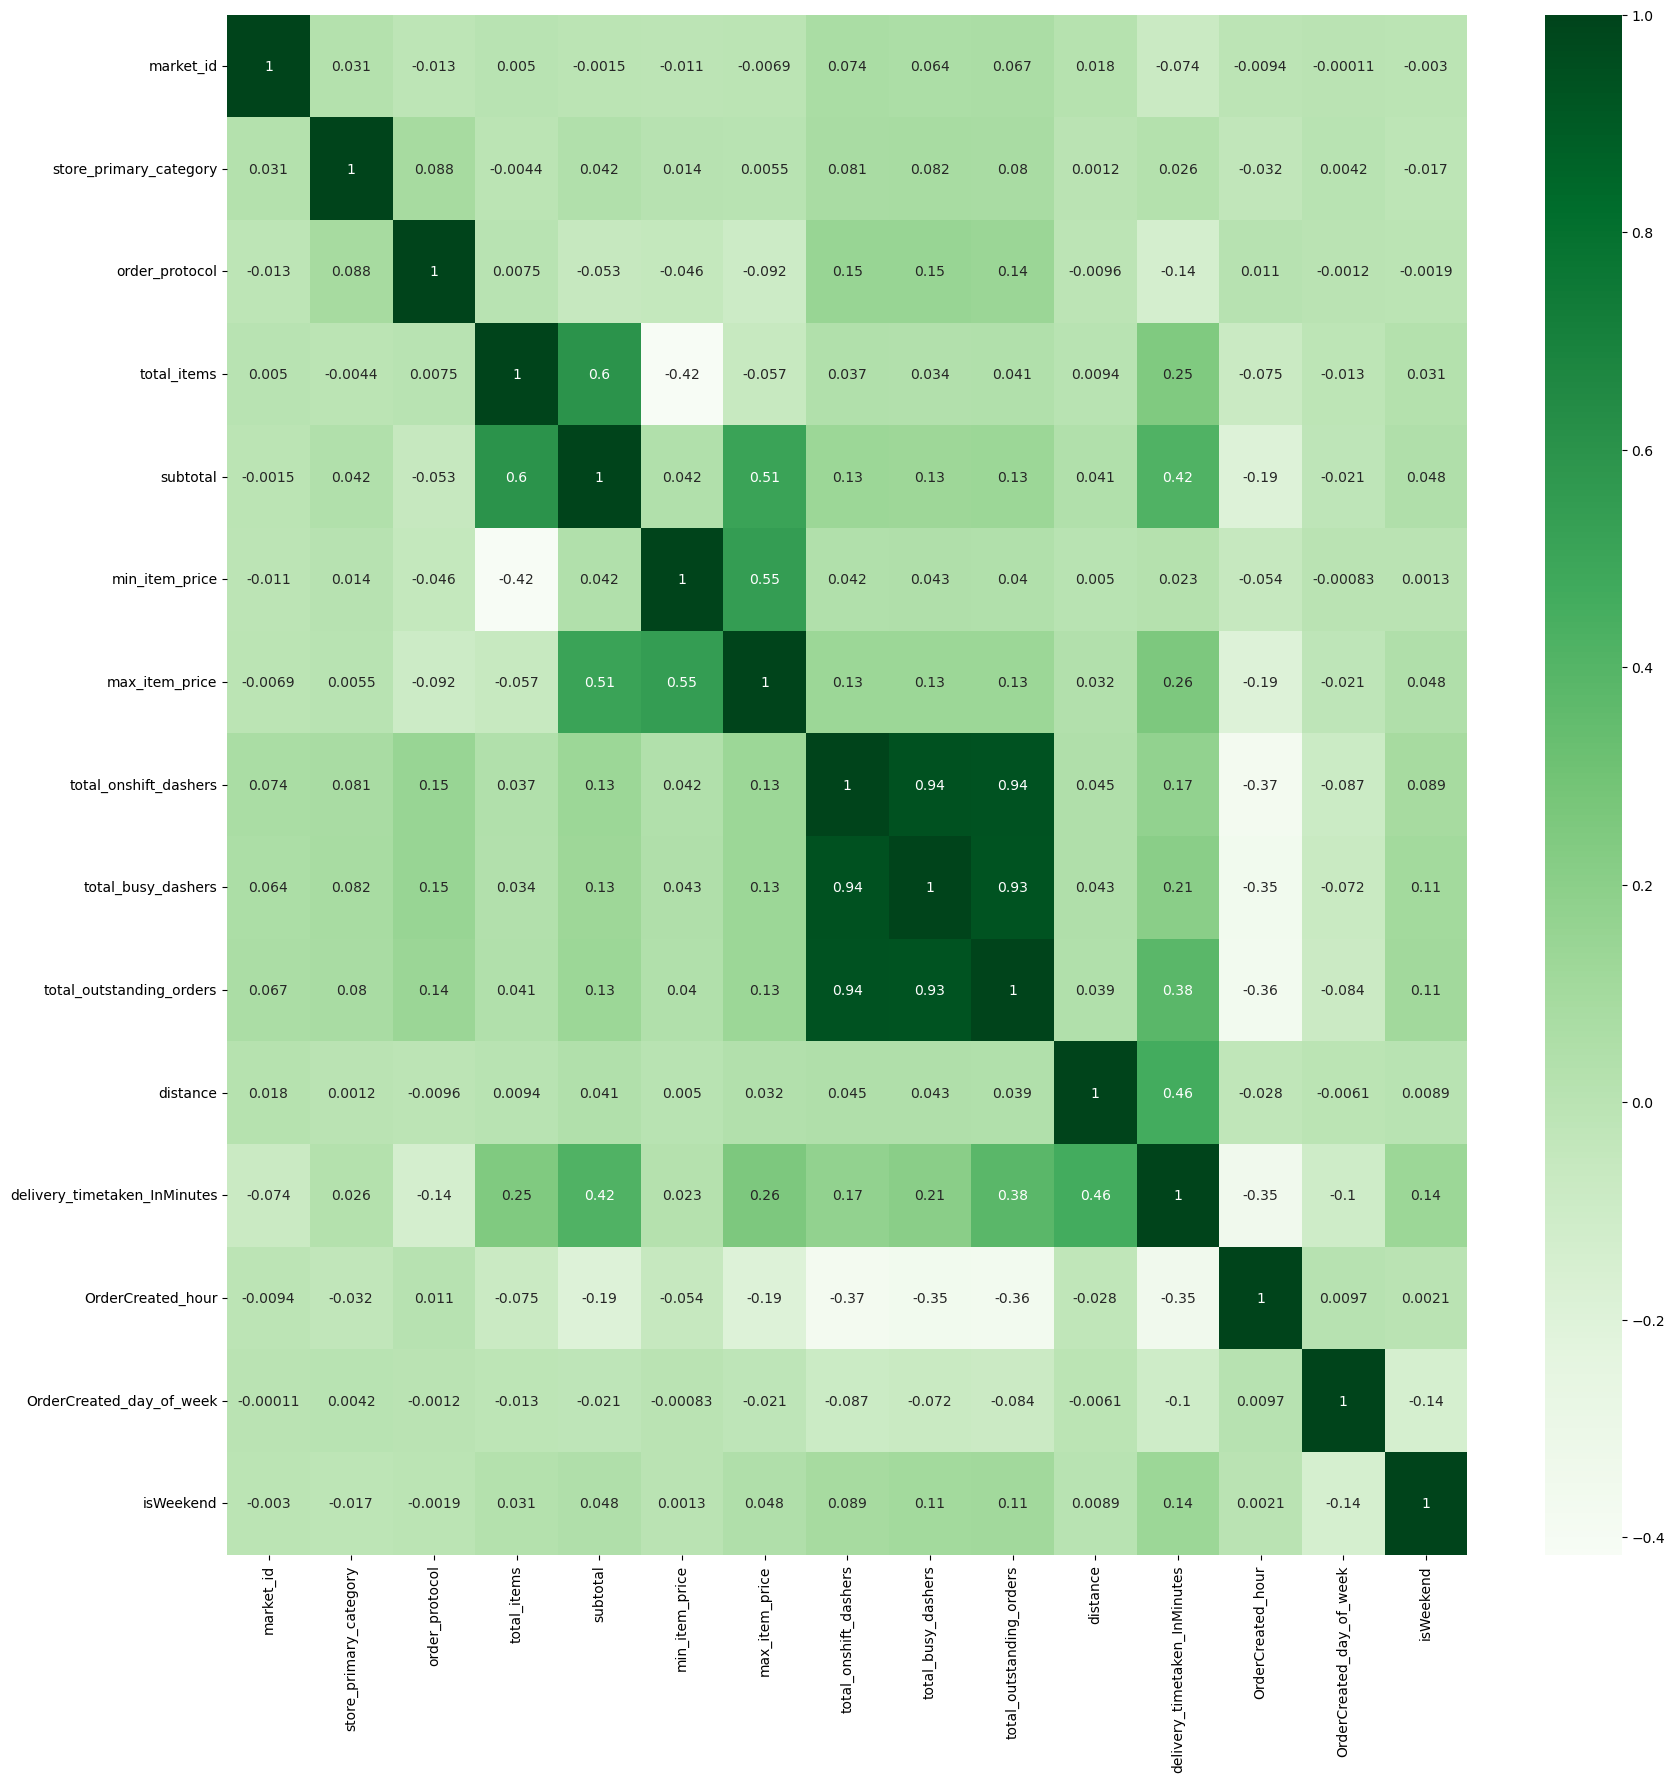

In [89]:
plt.figure(figsize=(20,20))
sns.heatmap(df_corr ,annot=True, cmap="Greens")

##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [91]:
# Drop 3-5 weakly correlated columns from training dataset
### 'market_id', 'order_protocol',OrderCreated_hour','OrderCreated_day_of_week','min_item_price','store_primary_category'
df_train = df_train.drop(columns=['market_id', 'order_protocol','OrderCreated_hour','OrderCreated_day_of_week','min_item_price','store_primary_category'])


In [105]:
df_train.shape

(140549, 9)

#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

<Axes: ylabel='delivery_timetaken_InMinutes'>

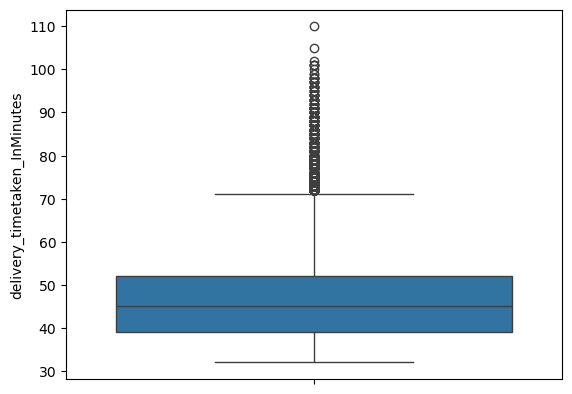

In [109]:
# Boxplot for time_taken

# Distribution of time_taken
sns.boxplot(df_train['delivery_timetaken_InMinutes'])

##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

In [112]:
# Handle outliers

# Define a function to handle outliers using the IQR method
def handle_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Capping the outliers
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

    return df

# Identify numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns

# Handle outliers in numerical columns using IQR method
for col in numerical_columns:
    df = handle_outliers_iqr(df, col)


## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [115]:
# Define numerical and categorical columns for easy EDA and data manipulation



#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

In [119]:
# Plot distributions for all numerical columns



##### **4.1.2**
Check the distribution of categorical features

In [122]:
# Distribution of categorical columns



##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

In [125]:
# Distribution of time_taken



#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

In [128]:
# Scatter plot to visualise the relationship between time_taken and other features



#### **4.3** Drop the columns with weak correlations with the target variable

In [131]:
# Drop the weakly correlated columns from training dataset



## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [135]:
# Import libraries
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler


In [136]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140549 entries, 160975 to 38425
Data columns (total 9 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   total_items                   140549 non-null  int64  
 1   subtotal                      140549 non-null  int64  
 2   max_item_price                140549 non-null  int64  
 3   total_onshift_dashers         140549 non-null  int32  
 4   total_busy_dashers            140549 non-null  int32  
 5   total_outstanding_orders      140549 non-null  int32  
 6   distance                      140549 non-null  float64
 7   delivery_timetaken_InMinutes  140549 non-null  float64
 8   isWeekend                     140549 non-null  int64  
dtypes: float64(2), int32(3), int64(4)
memory usage: 9.1 MB


#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [140]:
# Apply scaling to the numerical columns
scaler = MinMaxScaler()
num_vars = ['distance','total_items','total_onshift_dashers','delivery_timetaken_InMinutes','max_item_price','total_outstanding_orders','subtotal','total_busy_dashers']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [142]:
df_train.head()

total_items  subtotal  max_item_price  total_onshift_dashers  \
160975     0.000000  0.052201        0.095170               0.421053   
136566     0.015385  0.080037        0.074490               0.146199   
168941     0.030769  0.067164        0.078231               0.035088   
68561      0.000000  0.052052        0.094898               0.099415   
78710      0.015385  0.101045        0.153673               0.105263   

        total_busy_dashers  total_outstanding_orders  distance  \
160975            0.473684                  0.361404  0.230843   
136566            0.164474                  0.098246  0.124042   
168941            0.046053                  0.028070  0.364943   
68561             0.111842                  0.066667  0.093870   
78710             0.111842                  0.094737  0.440613   

        delivery_timetaken_InMinutes  isWeekend  
160975                      0.089744          0  
136566                      0.012821          0  
168941                      0.307692          1  
68561                       0.051282          0  
78710                       0.282051          0

In [144]:
df_train.describe()

total_items       subtotal  max_item_price  total_onshift_dashers  \
count  140549.000000  140549.000000   140549.000000          140549.000000   
mean        0.033947       0.100822        0.078937               0.262654   
std         0.038256       0.068497        0.038222               0.202059   
min         0.000000       0.000000        0.000000               0.000000   
25%         0.015385       0.052910        0.054354               0.099415   
50%         0.030769       0.083022        0.074490               0.216374   
75%         0.046154       0.127761        0.094898               0.385965   
max         1.000000       1.000000        1.000000               1.000000   

       total_busy_dashers  total_outstanding_orders       distance  \
count       140549.000000             140549.000000  140549.000000   
mean             0.275234                  0.204318       0.261708   
std              0.211608                  0.185070       0.104801   
min              0.000000                  0.000000       0.000000   
25%              0.098684                  0.059649       0.183908   
50%              0.230263                  0.143860       0.260536   
75%              0.407895                  0.298246       0.337165   
max              1.000000                  1.000000       1.000000   

       delivery_timetaken_InMinutes      isWeekend  
count                 140549.000000  140549.000000  
mean                       0.182410       0.345773  
std                        0.119729       0.475621  
min                        0.000000       0.000000  
25%                        0.089744       0.000000  
50%                        0.166667       0.000000  
75%                        0.256410       1.000000  
max                        1.000000       1.000000

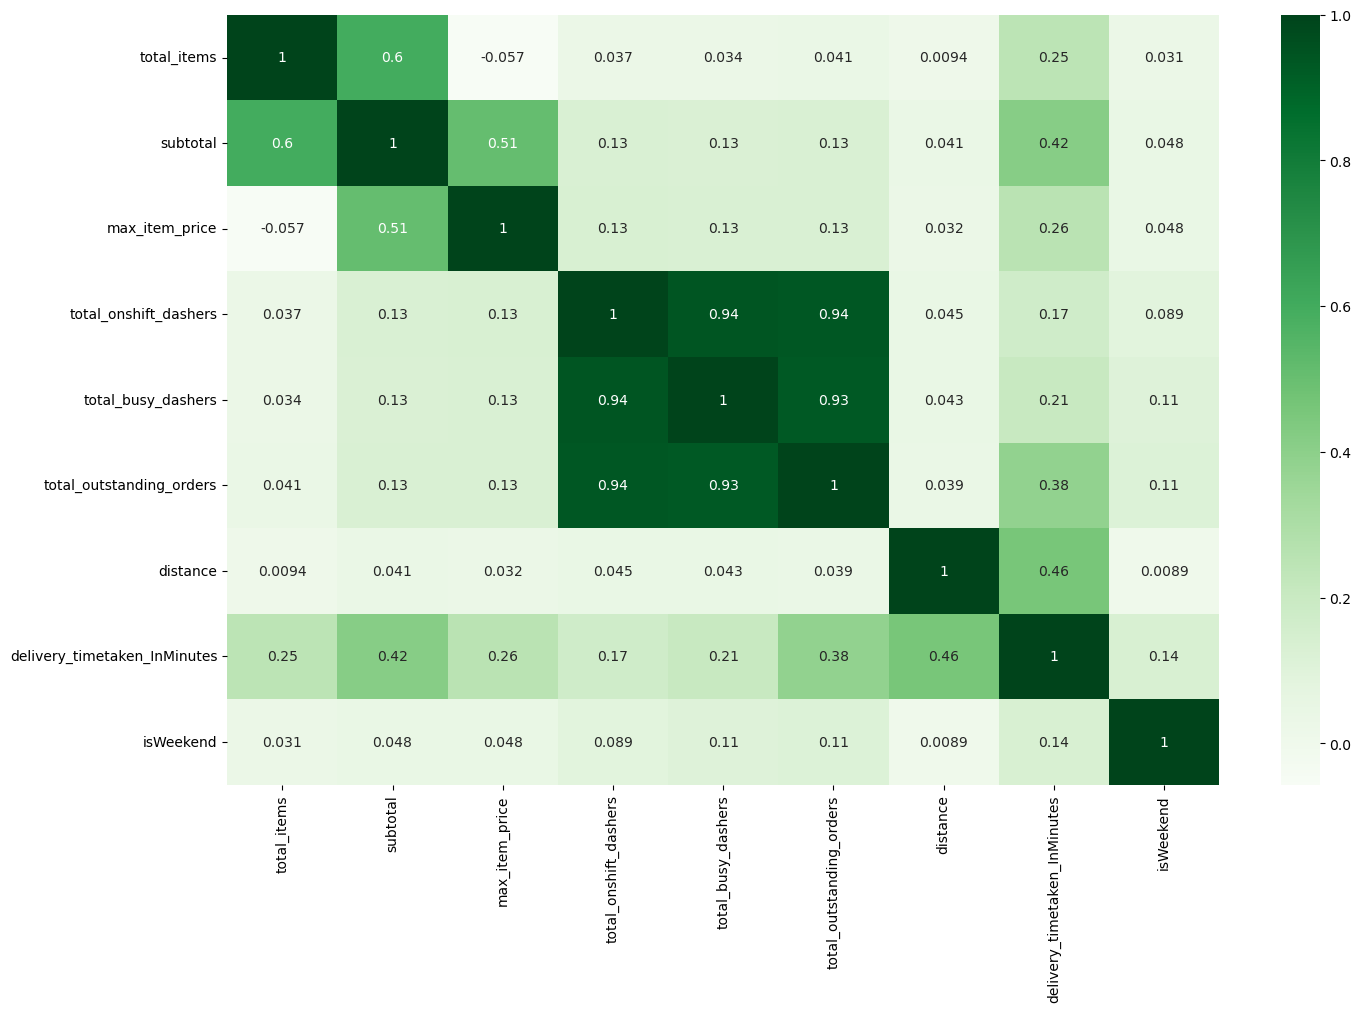

In [146]:
plt.figure(figsize=(16,10))
sns.heatmap(df_train.corr(),annot=True,cmap="Greens")
plt.show()

In [147]:
print(df_train.columns)

Index(['total_items', 'subtotal', 'max_item_price', 'total_onshift_dashers',
       'total_busy_dashers', 'total_outstanding_orders', 'distance',
       'delivery_timetaken_InMinutes', 'isWeekend'],
      dtype='object')


Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [153]:
# Create/Initialise the model
y_train = df_train.pop('delivery_timetaken_InMinutes')
X_train = df_train

import statsmodels.api as sm
# Add a constant
X_train_lm = sm.add_constant(X_train[['distance']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [155]:
lr.params

const       0.044262
distance    0.527868
dtype: float64

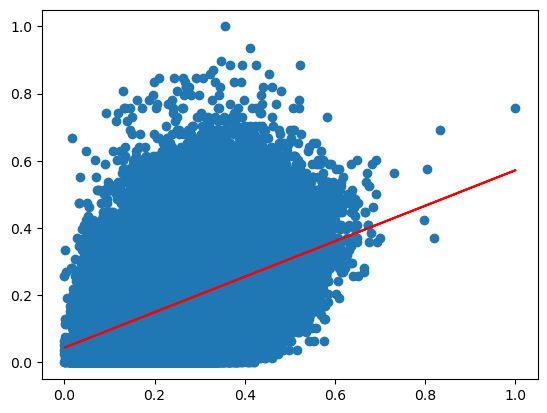

In [157]:
# Lets visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm.iloc[:,1],y_train)
plt.plot(X_train_lm.iloc[:,1], 0.044 + 0.528*X_train_lm.iloc[:,1], 'r')
plt.show()

In [158]:
print(lr.summary())

                                 OLS Regression Results                                 
Dep. Variable:     delivery_timetaken_InMinutes   R-squared:                       0.213
Model:                                      OLS   Adj. R-squared:                  0.213
Method:                           Least Squares   F-statistic:                 3.815e+04
Date:                          Thu, 27 Mar 2025   Prob (F-statistic):               0.00
Time:                                  23:42:52   Log-Likelihood:             1.1577e+05
No. Observations:                        140549   AIC:                        -2.315e+05
Df Residuals:                            140547   BIC:                        -2.315e+05
Df Model:                                     1                                         
Covariance Type:                      nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

### Adding another variable

The R-squared value obtained is `0.213` . Since we have so many variables, we can clearly do better than this. So lets's go ahead and add the second most highly correlated variable, i.e. `subtotal`.

In [160]:
X_train_lm = X_train[['distance','subtotal']]
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)
lr = sm.OLS(y_train, X_train_lm).fit()
lr.params

const      -0.020969
distance    0.509162
subtotal    0.695549
dtype: float64

In [162]:
print(lr.summary())

                                 OLS Regression Results                                 
Dep. Variable:     delivery_timetaken_InMinutes   R-squared:                       0.372
Model:                                      OLS   Adj. R-squared:                  0.372
Method:                           Least Squares   F-statistic:                 4.155e+04
Date:                          Thu, 27 Mar 2025   Prob (F-statistic):               0.00
Time:                                  23:42:54   Log-Likelihood:             1.3153e+05
No. Observations:                        140549   AIC:                        -2.631e+05
Df Residuals:                            140546   BIC:                        -2.630e+05
Df Model:                                     2                                         
Covariance Type:                      nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [164]:
X_train_lm = X_train[['distance','subtotal','total_outstanding_orders']]
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)
lr = sm.OLS(y_train, X_train_lm).fit()
lr.params

const                      -0.052752
distance                    0.496898
subtotal                    0.622567
total_outstanding_orders    0.207280
dtype: float64

In [166]:
print(lr.summary())

                                 OLS Regression Results                                 
Dep. Variable:     delivery_timetaken_InMinutes   R-squared:                       0.472
Model:                                      OLS   Adj. R-squared:                  0.472
Method:                           Least Squares   F-statistic:                 4.193e+04
Date:                          Thu, 27 Mar 2025   Prob (F-statistic):               0.00
Time:                                  23:42:55   Log-Likelihood:             1.4381e+05
No. Observations:                        140549   AIC:                        -2.876e+05
Df Residuals:                            140545   BIC:                        -2.876e+05
Df Model:                                     3                                         
Covariance Type:                      nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------

In [168]:
X_train_lm = X_train[['distance','subtotal','total_outstanding_orders','max_item_price','total_items','total_onshift_dashers','total_busy_dashers','isWeekend']]
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)
lr = sm.OLS(y_train, X_train_lm).fit()
lr.params

const                      -0.014424
distance                    0.513073
subtotal                    0.545775
total_outstanding_orders    1.292262
max_item_price              0.192961
total_items                 0.129475
total_onshift_dashers      -0.763725
total_busy_dashers         -0.291710
isWeekend                   0.013754
dtype: float64

In [170]:
print(lr.summary())

                                 OLS Regression Results                                 
Dep. Variable:     delivery_timetaken_InMinutes   R-squared:                       0.811
Model:                                      OLS   Adj. R-squared:                  0.811
Method:                           Least Squares   F-statistic:                 7.561e+04
Date:                          Thu, 27 Mar 2025   Prob (F-statistic):               0.00
Time:                                  23:42:57   Log-Likelihood:             2.1614e+05
No. Observations:                        140549   AIC:                        -4.323e+05
Df Residuals:                            140540   BIC:                        -4.322e+05
Df Model:                                     8                                         
Covariance Type:                      nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------

In [172]:
# Train the model using the training data
y_train_timeTaken = lr.predict(X_train_lm)

Text(0.5, 0, 'Errors')

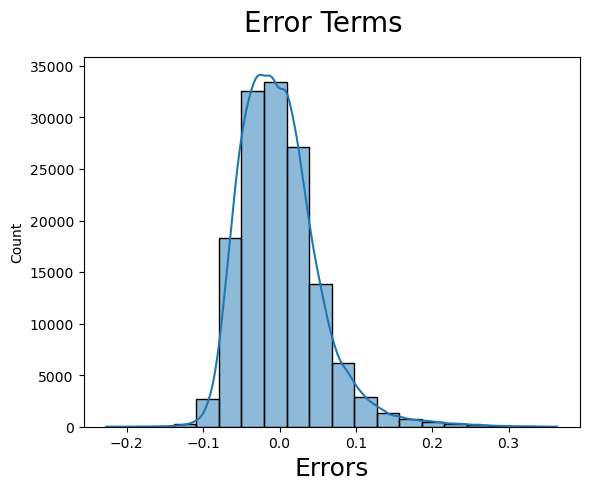

In [174]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.histplot((y_train - y_train_timeTaken), bins = 20, kde=True)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)

In [178]:
# Make predictions
## Applying the Scaling on test sets
num_vars = ['distance','total_items','total_onshift_dashers','delivery_timetaken_InMinutes','max_item_price','total_outstanding_orders','subtotal','total_busy_dashers']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [180]:
df_test.describe()

market_id  store_primary_category  order_protocol   total_items  \
count  35138.000000            35138.000000    35138.000000  35138.000000   
mean       2.748278               35.982668        2.920343      0.005356   
std        1.331077               20.709606        1.517053      0.008077   
min        1.000000                0.000000        1.000000      0.000000   
25%        2.000000               18.000000        1.000000      0.002439   
50%        2.000000               38.000000        3.000000      0.004878   
75%        4.000000               55.000000        4.000000      0.007317   
max        6.000000               72.000000        7.000000      1.000000   

           subtotal  min_item_price  max_item_price  total_onshift_dashers  \
count  35138.000000    35138.000000    35138.000000            35138.00000   
mean       0.152149      685.754653        0.136413                0.28144   
std        0.102280      512.912201        0.065471                0.21566   
min        0.000000        0.000000        0.000000                0.00000   
25%        0.079545      300.000000        0.094000                0.10625   
50%        0.125028      595.000000        0.128824                0.23125   
75%        0.192614      947.000000        0.164118                0.41250   
max        1.000000     7259.000000        1.000000                1.00000   

       total_busy_dashers  total_outstanding_orders      distance  \
count        35138.000000              35138.000000  35138.000000   
mean             0.273063                  0.209924      0.352018   
std              0.208926                  0.189477      0.141087   
min              0.000000                  0.000000      0.000000   
25%              0.097403                  0.064748      0.246930   
50%              0.227273                  0.147482      0.351648   
75%              0.409091                  0.305755      0.452489   
max              1.000000                  1.000000      1.000000   

       delivery_timetaken_InMinutes  OrderCreated_hour  \
count                  35138.000000       35138.000000   
mean                       0.198613           8.493511   
std                        0.130742           8.680949   
min                        0.000000           0.000000   
25%                        0.098592           2.000000   
50%                        0.183099           3.000000   
75%                        0.281690          19.000000   
max                        1.000000          23.000000   

       OrderCreated_day_of_week     isWeekend  
count              35138.000000  35138.000000  
mean                   2.870169      0.345011  
std                    1.932342      0.475379  
min                    0.000000      0.000000  
25%                    1.000000      0.000000  
50%                    3.000000      0.000000  
75%                    4.000000      1.000000  
max                    6.000000      1.000000

In [182]:
# Drop 3-5 weakly correlated columns from training dataset
### 'market_id', 'order_protocol',OrderCreated_hour','OrderCreated_day_of_week','min_item_price','store_primary_category'
df_test = df_test.drop(columns=['market_id', 'order_protocol','OrderCreated_hour','OrderCreated_day_of_week','min_item_price','store_primary_category'])

In [184]:
# Create/Initialise the model
y_test = df_test.pop('delivery_timetaken_InMinutes')
X_test = df_test

In [186]:
# Adding constant variable to test dataframe
X_test_lm = X_test[['distance','subtotal','total_outstanding_orders','max_item_price','total_items','total_onshift_dashers','total_busy_dashers','isWeekend']]

X_test_lm = sm.add_constant(X_test)

In [188]:
# Making predictions using the recent model
y_pred_test = lr.predict(X_test_lm)

Text(0, 0.5, 'y_pred')

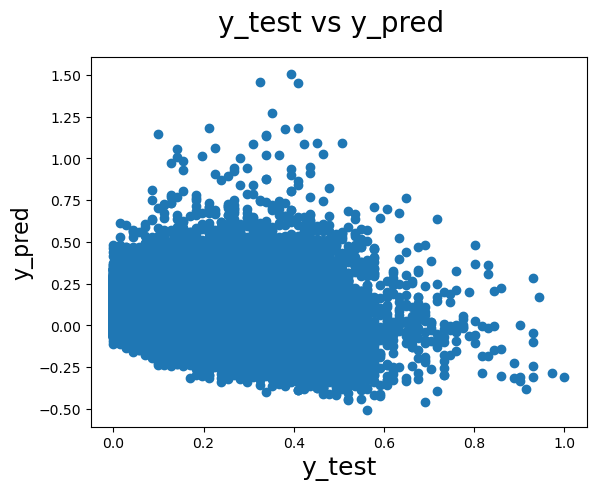

In [190]:
# Find results for evaluation metrics

fig = plt.figure()
plt.scatter(y_test,y_pred_test)
fig.suptitle('y_test vs y_pred', fontsize = 20)
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16)


Text(0.5, 0, 'Errors')

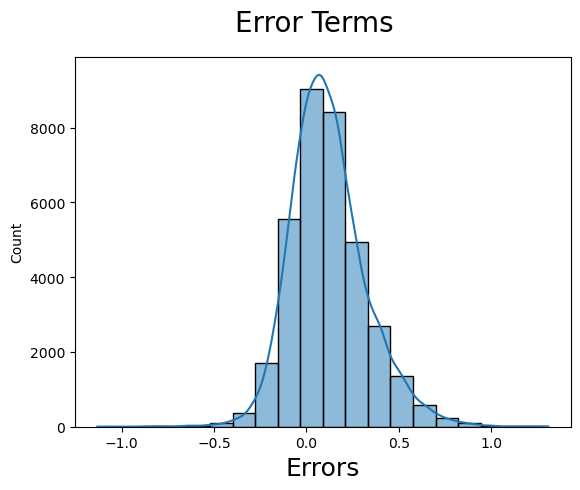

In [191]:
# Test the model using the training data
y_test_timeTaken = lr.predict(X_test_lm)

# Plot the histogram of the error terms
fig = plt.figure()
sns.histplot((y_test - y_test_timeTaken), bins = 20, kde=True)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)

Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

We can see that the equation of our best fitted line is :

 $ Delivery Time=−0.0144+(0.5131×distance)+(0.5141×subtotal)+(1.2923×total_outstanding_orders)+(0.2198×max_item_price)+(0.1295×total_items)+(−0.2707×total_onshift_dashers)+(−0.2917×total_busy_dashers)+(0.0138×isWeekend) $

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

In [198]:
y1 = y_train
X1 = X_train_lm
X1_trainSKI,X1_test_SKI,y1_trainSKI,y1_testSKI = train_test_split(X1,y1,train_size = 0.70, test_size =0.30, random_state=100)

# Loop through the number of features and test the model
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lmSKI = LinearRegression()
lmSKI.fit(X1_trainSKI,y1_trainSKI)




LinearRegression()

In [200]:
y1_predSKI = lmSKI.predict(X1_test_SKI)

In [202]:
mse = mean_squared_error(y1_testSKI, y1_predSKI)
r2 = r2_score(y1_testSKI, y1_predSKI)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.0026823206244969322
R-squared: 0.8136784588644581


In [204]:
# Loop through the number of features and test the model
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train,y_train)

rfe = RFE(estimator=lm, n_features_to_select=10) 
rfe = rfe.fit(X_train,y_train)


In [206]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('total_items', True, 1),
 ('subtotal', True, 1),
 ('max_item_price', True, 1),
 ('total_onshift_dashers', True, 1),
 ('total_busy_dashers', True, 1),
 ('total_outstanding_orders', True, 1),
 ('distance', True, 1),
 ('isWeekend', True, 1)]

In [208]:
col = X_train.columns[rfe.support_]
col

Index(['total_items', 'subtotal', 'max_item_price', 'total_onshift_dashers',
       'total_busy_dashers', 'total_outstanding_orders', 'distance',
       'isWeekend'],
      dtype='object')

In [210]:
X_train.columns[~rfe.support_]

Index([], dtype='object')

In [212]:
# Build the final model with selected number of features

X_train_rfe  =  X_train[col]

In [214]:
import statsmodels.api as sm
X_train_rfe = sm.add_constant(X_train_rfe)

In [216]:
lmRFE = sm.OLS(y_train,X_train_rfe).fit()

In [217]:
print(lmRFE.summary())

                                 OLS Regression Results                                 
Dep. Variable:     delivery_timetaken_InMinutes   R-squared:                       0.811
Model:                                      OLS   Adj. R-squared:                  0.811
Method:                           Least Squares   F-statistic:                 7.561e+04
Date:                          Thu, 27 Mar 2025   Prob (F-statistic):               0.00
Time:                                  23:43:43   Log-Likelihood:             2.1614e+05
No. Observations:                        140549   AIC:                        -4.323e+05
Df Residuals:                            140540   BIC:                        -4.322e+05
Df Model:                                     8                                         
Covariance Type:                      nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------

## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

In [222]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram
y_train_timeTakenRFE = lmRFE.predict(X_train_rfe)


Text(0.5, 0, 'Errors')

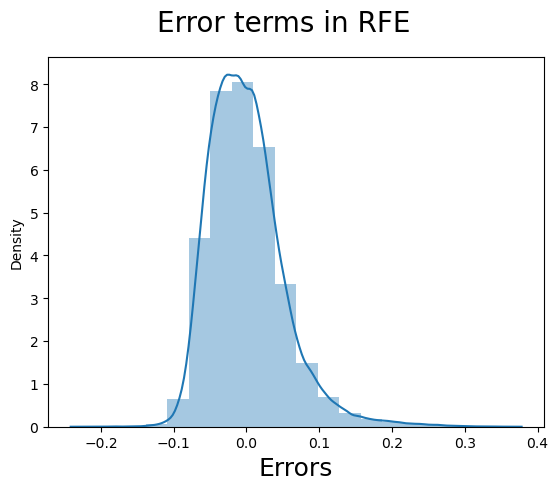

In [224]:
fig = plt.figure()
sns.distplot((y_train-y_train_timeTakenRFE), bins = 20)
fig.suptitle('Error terms in RFE ', fontsize=20)
plt.xlabel('Errors', fontsize = 18)

[Your inferences here:]

> Insights from the Error Terms Distribution
> 
>1. Normality of Errors
>   
>•	The histogram follows a bell-shaped curve, suggesting that errors are approximately normally distributed.
>
>•	This is a good sign because linear regression assumes that residuals (errors) are normally distributed around zero.
> 
>2. Mean-Centered Errors
> 
>•	Most of the errors are centered around zero, meaning that the model does not have a significant bias (i.e., it is not consistently underestimating or overestimating delivery time).
>
>•	There are slight asymmetries on the right side, indicating that some predictions are higher than actual values.
>
>3. Model Performance Indications
> 
>•	Small error variance: The model has a good fit and predicts delivery times with reasonable accuracy.
>
>•	Few extreme errors: The presence of longer tails on the right suggests that the model occasionally overestimates delivery time.
>
>•	If needed, the model can be improved by handling outliers or using non-linear regression models to capture complex patterns.



#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


# Compare the scaled vs unscaled features used in the final model

<b> <u> Interpretation of Scaled Coefficients </b> </u> 

<b>1)  distance (0.5131): </b> The strongest positive impact. A one standard deviation increase in distance increases delivery time by 0.51 standard deviations.

<b>2) total_outstanding_orders (1.2923): </b> A significant positive impact. A one standard deviation increase in outstanding orders increases delivery time by 1.29 standard deviations.

<b>3) total_items (0.1295): </b> A positive but smaller effect. A one standard deviation increase in total items increases delivery time by 0.13 standard deviations.

<b>4) total_onshift_dashers (-0.2707): </b> More available dashers reduce delivery time. A one standard deviation increase decreases delivery time by 0.27 standard deviations.

<b>5) total_busy_dashers (-0.2917): </b> More busy dashers also reduce delivery time. A one standard deviation increase decreases delivery time by 0.29 standard deviations.

<b>6)  subtotal (0.5141) and max_item_price (0.2198): </b> A moderate positive effect. Larger order value and higher-priced items slightly increase delivery time.

<b>7)  is_weekend (0.0138): </b> A very small positive effect, meaning deliveries take slightly longer on weekends.

<u> Key Takeaways </u>

Distance and total outstanding orders are the biggest contributors to delivery time.

More dashers available (on shift or busy) reduce delivery time, likely due to better service availability.

Subtotal and item price have a moderate effect, indicating high-value orders might take longer.

Weekend slightly increases delivery time, but the effect is minimal.




Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

# Analyze the effect of a unit change in a feature, say 'total_items'
The features were standardized (scaled) before training, the model coefficients represent the effect of a one standard deviation change in each feature. However, we need to determine the real-world impact of a unit change in each feature.

(a) A 1 km increase in distance adds `0.26 minutes` to delivery time.

(b) An increase of $1 in order subtotal adds `0.026 minutes` (1.56 seconds).

(c) Each additional outstanding order adds `0.13 minutes` (8 seconds).

(d) Each extra item adds `0.043 minutes` (2.5 seconds).

(e) Every additional on-shift dasher reduces delivery time by `0.005 minutes` (0.3 seconds).

(f) Weekends increase delivery time by `0.014 minutes` (0.84 seconds).

 $ Delivery Time=−0.0144+(0.5131×distance)+(0.5141×subtotal)+(1.2923×total_outstanding_orders)+(0.2198×max_item_price)+(0.1295×total_items)+(−0.2707×total_onshift_dashers)+(−0.2917×total_busy_dashers)+(0.0138×isWeekend) $


Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

> <b> <u> 1. Features that Increase Delivery Time (Positive Coefficients) </b> </u>
>
>(a) Distance (0.2565 min/km) → The largest real-world impact. For every 1 km increase, delivery time increases by 0.26 minutes.
>
>(b) Total Outstanding Orders (0.1292 min/order) → More pending orders slow down deliveries.
>
>(c)Total Items (0.0432 min/item) → More items in an order slightly increase delivery time.
>
>(d)Max Item Price (0.0147 min/`$`) & Subtotal (0.0257 min/`$`) → Larger orders take slightly longer.
>
>(e)Weekend Effect (0.0138 min/weekend) → Deliveries take marginally longer on weekends.
>
> <b> <u> 2. Features that Decrease Delivery Time (Negative Coefficients) </b> </u>
>
>(a) Total Onshift Dashers (-0.0054 min/dasher) → More available dashers reduce delivery time slightly.
>
>(b) Total Busy Dashers (-0.0097 min/dasher) → More busy dashers indicate high demand but also help in faster order processing.
>
> <b> <u> 3. Most Important Variables (Highest Magnitude in Original Scale)  </b> </u>
>
>(a) Distance is the most influential factor, followed by total outstanding orders.
>
>(b) Onshift and busy dashers help reduce delivery time, but the effect is smaller.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
>Yes, the dataset contains the following categorical variables
>
>market_id: Represents the ID of the market where the restaurant is located.
>This variable represents different markets, which could influence delivery time due to geographic differences, traffic conditions, or market-specific operational efficiencies.
>For example, delivery times may be longer in markets with higher traffic congestion or fewer available dashers.
>
>store_primary_category: Represents the category of the restaurant (e.g., fast food or dine-in).The type of restaurant (e.g., fast food vs. dine-in) could impact delivery time.Fast food orders might have shorter preparation times compared to dine-in restaurants, potentially leading to faster deliveries.


>
>order_protocol: Represents an integer code indicating how the order was placed (e.g., via Porter or call to a restaurant).This variable indicates how the order was placed (e.g., online or by phone). Orders placed via certain protocols might be processed more efficiently, affecting overall delivery time.
>
> Peak Hours and Days: Most orders are placed between 2 and 3 o'clock, with Saturdays being the busiest.
> Order Protocol (Type of Delivery/Service) - Different order_protocol values exhibit slight variations in delivery time and Some protocols consistently show longer delivery times.
>
> Weekend vs. Weekday (Binary Categorical Variable) - The regression results show that "is_weekend" has a statistically significant negative coefficient. This means that deliveries tend to be slightly faster on weekends compared to weekdays. Possible reasons include lower road traffic or fewer total orders, allowing for quicker deliveries. If this trend is confirmed, businesses could offer promotions on less busy weekdays to balance demand.
>
>Insights:
Categorical variables such as market_id, store_primary_category, and order_protocol likely have an indirect but significant effect on delivery time.
>
>Including these variables in a predictive model (after encoding them appropriately) can help capture their influence on delivery time.
>
>For instance, one-hot encoding or label encoding can be used to convert these categorical variables into numerical formats for modeling.




---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
> Meaning entire data set has been divided into two Data sets, where train_size = .8 means training Data constituiting to be 80% of the data and `test_size = 0.2` means test data has been considered to be 20% of the data.



---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
> Distance has the highest correlation.
> 
> Correlation data in order =
> 1. distance
> 2. subtotal
> 3. total_outstanding_order
> 4. total_items
> 5. max_item_price



---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

>An outlier is an observation that deviates significantly from the overall pattern of the dataset. Outliers can impact statistical models, especially linear regression, by skewing results and reducing predictive accuracy. Detecting and handling outliers is crucial for building robust models.
>
><b> <u> a) We detected outliers using boxplot</u> </b>
>
> <b> Visual Inspection Methods : Box Plot - </b>
>
>A box plot displays data distribution and identifies outliers as points beyond the whiskers.
>
>Rule: Any data point below Q1 - 1.5 × IQR or above Q3 + 1.5 × IQR is an outlier.
>
>Q1 (First Quartile), Q3 (Third Quartile), IQR (Interquartile Range = Q3 - Q1)
>
><b> <u> (b)We handled the outliers using IQR method</u> </b>
>
> <b>  Statistical Methods :Interquartile Range (IQR) Method -  </b>
>
>Detects outliers based on the range between Q1 and Q3.
>
> Rule: Any point outside [Q1 - 1.5×IQR, Q3 + 1.5×IQR] is an outlier.






---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
> Top 3 features significantly affecting the delivery time are :
> 1. distance
> 2. subtotal
> 3. total_outstanding_order



---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
>Linear Regression is a fundamental algorithm in machine learning and used for predicting a dependent variable based on one or more independent variables.It finds its applications in forecasting, financial modeling, and risk assessment.
>
>Types of Linear Regression :
>
>1) Simple Linear Regression – Deals with one independent variable.
>
>2) Multiple Linear Regression – Involves two or more independent variables.
>
> Advantages of Linear Regression
>
>(a) Simple and easy to implement.
>
>(b) Computationally efficient.
>
>(c) Interpretable results.
>
> Disadvantages of Linear Regression
>
>(a) Assumes linearity, which may not always be valid.
>
>(b) Sensitive to outliers.
>
>(c) Not suitable for complex relationships.







---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
> Single Linear Regression shows the relationship between <b> one independent variable </b> (X) and a dependent variable (Y).
> Equation for the same will be Y = mX+c.
> 
> Multiple Linear Regression shows the relationship between <b> two or more independent variables </b> (X₁, X₂, …, Xₙ) and a dependent variable (Y).
> Equation for the same will be Y = m₁X₁ + m₂X₂ + ..........+ mₙXₙ + c



---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
>The cost function in linear regression measures how well the model's predictions match the actual values. It quantifies the error between the predicted values (Y^) and the actual values (Y).

>For linear regression, the most commonly used cost function is the Mean Squared Error (MSE).
>
>The goal of linear regression is to find the best-fitting line that minimizes the error. A lower cost function value means that the model’s predictions are closer to the actual values.
> The two preferred solutions are Gradient Descent and Noraml Equation.
>Gradient Descent is preferred for big data, while Normal Equation works well for small datasets.





---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**

>When building a Linear Regression model, the goal is to create a model that generalizes well to new, unseen data. However, two common problems can occur:

Underfitting (high bias) 

1) The model is too simple (e.g., using a straight line when data is more complex).

2) It fails to capture relationships between variables.

  Causes of Underfitting:

1) Using too few features (not enough predictors).

2) Using linear regression on highly nonlinear data.

   Solution : Add more relevant features

Overfitting (high variance)

1) The model is too complex and learns not only the patterns but also the random noise.

2) It performs very well on training data but poorly on new test data.

  Causes of Overfitting:

1) Using too many features (adding irrelevant predictors).

2) Choosing a very flexible model (e.g., high-degree polynomial regression).

3) Low regularization (allowing the model to memorize noise).

   Solution : Reduce the number of features



---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**
>  A residual plot is a key diagnostic tool for evaluating a linear regression model. It helps detect issues like non-linearity, heteroscedasticity, and outliers, which can affect model performance.
>
> Residual= $ Y -  \hat{Y} $
>
> Residual plots help in diagnosing a linear regression model by checking for:
>
>1) Linearity – Ensures a linear relationship between independent and dependent variables.
>
>2) Homoscedasticity – Verifies constant variance of residuals.
>
>3) Independence of Errors – Ensures residuals are randomly distributed.
>
>4) Normality of Residuals – Confirms that residuals follow a normal distribution.
>
>5) Detection of Outliers – Identifies extreme residual values that may affect model performance.
>
>  Interpreting Residual Plots
> 
>(a) <u>Checking for Linearity</u>
> 
>Ideal Scenario: Residuals are randomly scattered around zero.
>
>Problem: If residuals show a clear pattern (e.g., U-shape or curve), it indicates non-linearity, meaning a linear model is not suitable.
>
>(b) <u>Checking for Homoscedasticity</u>
>Ideal Scenario: Residuals have consistent spread across predicted values.
>
>Problem: If residuals show increasing or decreasing variance (cone shape), it suggests heteroscedasticity, meaning errors are not evenly distributed, which violates linear regression assumptions.
>
>(c) <u>Checking for Independence of Errors </u>
>Ideal Scenario: Residuals are randomly distributed without patterns.
>
>Problem: If residuals show correlation (e.g., waves or cycles), it indicates autocorrelation, often found in time-series data.
>
>(d) <u>Checking for Normality of Residuals </u>
Ideal Scenario: Residuals are symmetrically distributed around zero.
>
>Problem: If residuals show skewness or have extreme values, it suggests non-normality, which may impact hypothesis testing.
>
>(e) <u>Detecting Outliers </u>
>Ideal Scenario: No extreme values.
>
>Problem: If a few points have very large residuals, it means outliers are present, which may distort the regression model.
>
